In [8]:
import torch
import numpy as np
import torch.nn as nn
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

In [13]:
with open('output.txt') as f:
    output = f.readlines()

output = "\n".join(output)

In [76]:
utilizations = re.findall(r"(?<=Codebook utilization: )\d\..*(?=\n)", output)
utilizations = [float(v) for v in utilizations]

In [90]:
len(utilizations)

299

In [89]:
df = pd.read_csv("checkpoints/vqgan/losses.csv")
df2 = pd.read_csv("losses.csv")

df['epoch'] = df['epoch'] + 100
losses = pd.concat([df, df2])
losses = losses.sort_values(by = 'epoch')
epochs = range(len(losses))

losses.to_csv("checkpoints/vqgan/losses_complete.csv")

In [67]:
df.columns

Index(['epoch', 'loss', 'recon_loss', 'commit_loss', 'perceptual_loss',
       'disc_loss', 'generator_loss', 'disc_factor', 'adaptive_weight'],
      dtype='object')

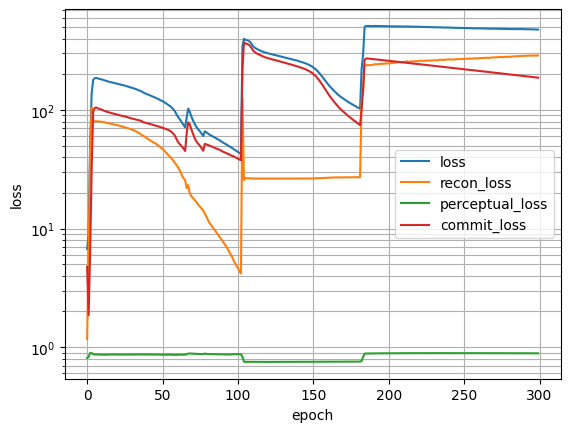

In [74]:
fig, ax = plt.subplots()
ax.plot(epochs, losses['loss'], label = 'loss')
ax.plot(epochs, losses['recon_loss'], label = 'recon_loss')
ax.plot(epochs, losses['perceptual_loss'], label = 'perceptual_loss')
ax.plot(epochs, losses['commit_loss'], label = 'commit_loss')
# ax.plot(epochs, losses['disc_loss'], label = 'disc_loss')
ax.set_ylabel("loss")
ax.set_yscale("log")
ax.set_xlabel("epoch")
ax.grid(which = "both")
ax.legend()

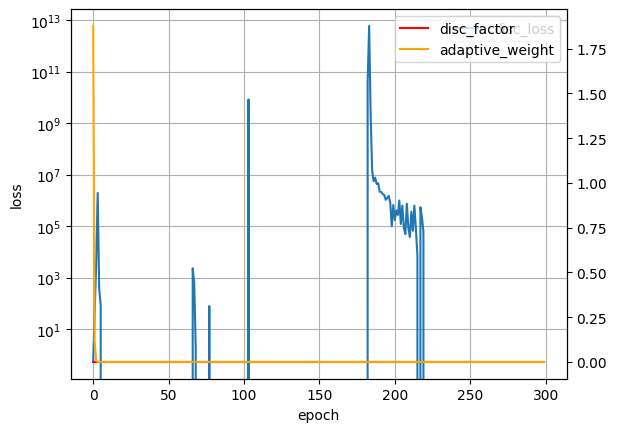

In [86]:
fig, ax = plt.subplots()
ax.plot(epochs, losses['disc_loss'], label = 'disc_loss')
ax2 = ax.twinx()
ax2.plot(epochs, losses['disc_factor'], label = 'disc_factor', color = 'red')
ax2.plot(epochs, losses['adaptive_weight'], label = 'adaptive_weight', color = 'orange')
ax.set_ylabel("loss")
ax.set_yscale("log")
ax.set_xlabel("epoch")
ax.grid(which = "both")
ax.legend()
ax2.legend()

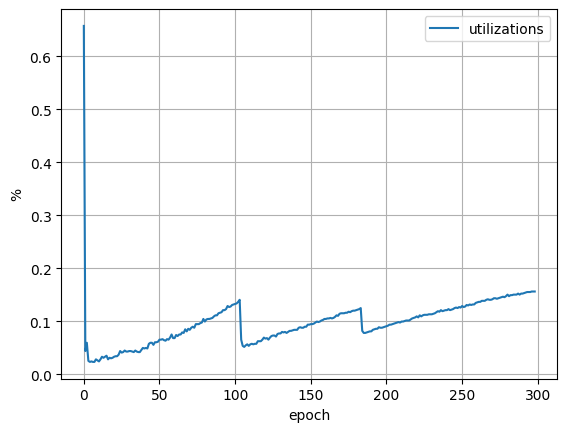

In [79]:
fig, ax = plt.subplots()
ax.plot(range(299), utilizations, label = 'utilizations')
ax.set_ylabel("%")
ax.set_xlabel("epoch")
ax.grid(which = "both")
ax.legend()

In [88]:
losses['disc_factor'].unique()

array([0.])